# 3_4_5 Visualizations with Pandas

Introduction to basic Pandas visualization capabilities

Pandas library will probably be your first option to create visual insights to understand the data more. The main advantage is that you can visualize the data using simple and straightforward methods. Behind the scene, when we call Pandas' plotting methods, there is a Matplotlib library, which is used as an engine. But don't worry about this library as we will cover it in the latter lesson.

The occupancy detection dataset:
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#. 


This dataset is intended to solve binary classification problems according to attributes, which could indicate whether a person is present in the room. 

Let´s import Pandas library and read the data.

In [3]:
# Import Pandas library
import pandas as pd

In [4]:
# Read the data
data = pd.read_csv('room_occupancy.txt')

In [5]:
# Take a peek at the first 10 rows
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


Firstly, let's examine what variables we are dealing with.

- date: the specific day and time when the values were recorded 
- Temperature: measured in Celsius
- Humidity: relative humidity - a present state of absolute humidity relative to a
    maximum humidity given the same temperature expressed as a          percentage
- Light: in Lux unit
- CO2: in ppm unit (parts per million)
- HumidityRatio: derived quantity from temperature and relative humidity, expressed in kilograms of water vapor per kilogram of dry air  
- Occupancy: 
the presence of a person in the room: the occupancy of the room was obtained from pictures that were taken every minute for a period of 8 days (1 if a person is present, 0 otherwise)


Let´s look at the variables data type using `.dtypes` attribute.

In [6]:
# Check variables data type
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

All of the variables have been correctly read except 'date' variable, which Python recognized as an object. Convert the object data type to datetime using Pandas. 

In [7]:
# Convert date variable using Pandas to_datetime method
data['date'] = pd.to_datetime(data['date'])

Let´s check whether there are some missing values that we need to be concerned with. 

In [8]:
# Check missing values
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Alright, there are no missing values in the DataFrame so that we can proceed to visualizations. 

## Plot method

We´ll be using a `.plot()` method, which creates the line plot by default where each record from DataFrame is displayed in the form of a continuous line. 

## Line plot



Let´s create a line plot of variable Temperature. You can select one variable by indexing it with square brackets. It is possible to plot multiple columns by passing a list of respective columns separated by a comma within square brackets. 

<AxesSubplot:>

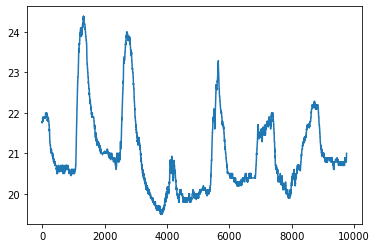

In [9]:
data['Temperature'].plot()

On the x-axis are plotted all of the records from our dataset and corresponding temperature values on the y-axis. 

You can see that this method returns ```<AxesSubplot:>``` object. But what does it mean? 

For now, remember that each graph is actually represented as a Figure object that serves as the base. There two axes (x-axis and y-axis) on which the values are plotted within this Figure. In the latter section, we´ll reveal more details about Figures and Axis. 
To avoid displaying this label, you can put a semicolon at the end of the code.

It is possible to plot one column against another one, as we see in the example below. We specify date variable on the x-axis and CO2 variable on the y-axis, representing the amount of CO2 related to the specific date.
Within `.plot()` method, you can set several parameters such as color, title, axis names, legend format, etc. For more information about parameter settings, see [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

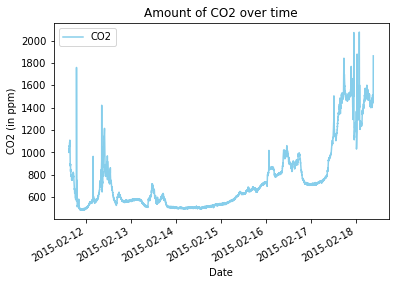

In [12]:
data.plot(x = 'date', y = 'CO2',             # Specifying variabes on the axis
          color = 'skyblue',                 # Setting a color
          title = 'Amount of CO2 over time', # Setting a title of a plot 
          xlabel = 'Date',                   # Setting x-axis name
          ylabel = 'CO2 (in ppm)');          # Setting y-axis name

The line plot is now showing a trend of CO2 amount over a period of time from 12.02.2015 (Thursday) till 18.02.2015 (Wednesday). The graph shows how the amount of CO2 has been decreasing during the weekend (14.02.2015 - 15.02.2015). 

One of the `.plot()` method´s parameters is `kind`, using which you can set several plot styles. You simply define the selected plot as a string to this parameter. Let´s look at the plot that reveals the data points distribution called a histogram.  

## Histogram


<AxesSubplot:ylabel='Frequency'>

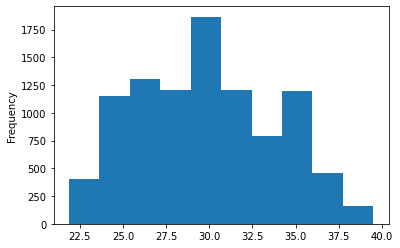

In [11]:
data['Humidity'].plot(kind='hist')

### Citation request:
Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, VÃ©ronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.